## Variables, Frames and Data Manipulation

In [7]:
%load ../rapaio-bootstrap

There are two main data structures used all over the place: variables and frames. A variable is a list of values of the same type. You can think of a variable as a column of a table. A set of variables is a data frame. A frame is a table having observations as rows and variables as columns.

Let's take a simple example. We will load the iris data set, which is provided by the the library.

In [27]:
Frame df = Datasets.loadIrisDataset();
df.printSummary();

Frame Summary
* rowCount: 150
* complete: 150/150
* varCount: 5
* varNames: 

0. sepal-length : dbl | 3.  petal-width : dbl | 
1.  sepal-width : dbl | 4.        class : nom | 
2. petal-length : dbl | 

* summary: 
 sepal-length [dbl]      sepal-width [dbl]      petal-length [dbl]     
       Min. : 4.3000000       Min. : 2.0000000        Min. : 1.0000000 
    1st Qu. : 5.1000000    1st Qu. : 2.8000000     1st Qu. : 1.6000000 
     Median : 5.8000000     Median : 3.0000000      Median : 4.3500000 
       Mean : 5.8433333       Mean : 3.0573333        Mean : 3.7580000 
    2nd Qu. : 6.4000000    2nd Qu. : 3.3000000     2nd Qu. : 5.1000000 
       Max. : 7.9000000       Max. : 4.4000000        Max. : 6.9000000 
                                                                       

 petal-width [dbl]            class [nom] 
      Min. : 0.1000000 versicolor :    50 
   1st Qu. : 0.3000000     setosa :    50 
    Median : 1.3000000  virginica :    50 
      Mean : 1.1993333               

Frame summary is a simple way to see some general information about a data frame. We see the data frame contains $150$ observations and $5$ variables.

The listing continues with name and type of the variables. Notice that there are four double variables and one nominal variable, named `class`.

The summary listing ends with a section which describes each variable. For double variables the summary contains the well-known $6$ number summary. We have there the minimum and maximum, median, first and third quartile and the mean. For nominal values we have an enumeration of the first most frequent levels and the associated counts. For our `class` variable we see that there are three levels, each with $50$ instances.

## Variables

In statistics a variable has multiple meanings. A random variable can be thought as a process which produces values according to a distribution. `Var` objects models the concept of values drawn from a unidimensional random variable, in other words a sample of values. As a consequence a `Var` object has a size and uses indexes to access values from sample. 

A variable is an array of values of same type and meaning. Each variable implements an interface called `Var`. `Var` implements many useful methods for various kinds of tasks:
* _manipulate values_ from the variable by adding, removing, inserting and updating with different representations
* _naming_ a variable offers an alternate way to identify a variable into a frame and it is also useful as output information
* _manipulate sets of values_ by with concatenation and mapping
* _streaming_ allows traversal of variables by java streams
* other tools like deep copy, deep compare, summary, etc

## VarType: storage and representation of a variable

There are two main concepts which have to be understood when working with variables: **storage** and **representation**. All the variables are able to store data internally using a Java data types like  `double`, `int`, `String`, etc. In the same time, the data from variables can be represented in different ways, all of them being available through the `Var` interface for all types of variables.

However not all the representations are possible for all types of variables, because some of them does not make sense. For example double floating values can be represented as strings, which is fine, however strings in general cannot be represented as double values.

These are the following data representations all the `Var`-iables can implement:

* **double** - double
* **int** - int
* **long** - long
* **instant** - Instant
* **label** - String

The `Var` interface offers methods to get/update/insert values for all those data representations. Not all data representations are available for all variables. For example the label representation is available for all sort of variables. This is acceptable, since when storing information into a text-like data format, any data type should be transformed into a string and also should be able to be read from a string representation.

To accomodate all those legal possibilities, the rapaio library has a set of predefined variable types, which can be found in the enum `VarType`.

The defined variable types:

VType      | Var class | Description
-----------|-----------|-------------
**BINARY** | VarBinary | Binary variable represented as int values, internally uses bitsets for efficient memory usage
**INT**    | VarInt    | Integer variable represented and stored internally as int
**NOMINAL**| VarNominal| Categorical variable represented as string from a predefined set, with no ordering (for example: _male_, _female_)
**DOUBLE** | VarDouble | Double  variable represented and stored internally as double precision floating point values
**LONG**   | VarLong   | Long variable represented and stored internally as long 8-byte signed integer values
**INSTANT**| VarInstant| Instant variable represented and stored as datetime instant 
**STRING** | VarString | String variable used for manipulation of text with free form

A data type is important for the following reasons:

* gives a certain useful meaning for variables in such a way that machine learning or statistical algorithms can leverage to maximum potential the meta information about variables
* encapsulates the stored data type artifacts and hide those details from the user, while allowing the usage of a single unified interface for all variables

## VarDouble

Numeric double variables are implemented by `VarDouble` and are used to handle discrete or continuous numerical values. Double variables offers value and label representations. All other representations can be used, but with caution since it can alter the content. For example int representation truncates floating point values to the biggest integer values, however the int setter sets a correct value since an integer can be converted to a double with no information loss.

### Various builders

Double variables can be built in various was and are handy shortcuts for various scenarios.

In [33]:
// builds a variable with no data
Var empty1 = VarDouble.empty();

// builds a variable of a given size which contains only missing data
Var empty2 = VarDouble.empty(100);

// a sequence of numbers, starting from 0, ending with 5 with step 1
Var seq1 = VarDouble.seq(5);

// a sequence of numbers, starting from 1, ending with 5 with step 1
Var seq2 = VarDouble.seq(1, 5);

// a sequence of numbers starting at 0, ending at 1 with step 0.1
Var seq3 = VarDouble.seq(0, 1, 0.1);

// build a variable of a given size which contains only zeros
Var fill1 = VarDouble.fill(5);

// builds a variable of a given size which contains only ones
Var fill2 = VarDouble.fill(5, 1);

// numeric variable which contains the values copied from another variable
Var copy1 = VarDouble.copy(seq1);

// numeric variable with values copied from a collection
Normal normal = Normal.std();
List<Double> list1 = DoubleStream.generate(normal::sampleNext).limit(10).boxed().collect(Collectors.toList());
Var copy2 = VarDouble.copy(list1);

// numeric variable with values copied from a double array
Var copy3 = VarDouble.copy(1, 3, 4.0, 7);

// numeric variable with values copied from an int array
Var copy4 = VarDouble.copy(1, 3, 4, 7);

// numeric variables with values generated as the sqrt of the row number
Var from1 = VarDouble.from(10, Math::sqrt);

// numeric variable with values generated using a function which receives a row value
// as parameter and outputs a double value; in this case we generate values as
// a sum of the values of other two variables
Var from2 = VarDouble.from(4, row -> copy3.getDouble(row) + copy4.getDouble(row));

// numeric variable with values generated from values of another variable using
// a transformation provided via a lambda function
Var from3 = VarDouble.from(from1, x -> x + 1);

**Sequence of values**

**Variables filled with the same number**

**Copy from another source**

**Generated using a lambda function**

**Wrapper around a double array**
This builder creates a new numeric variable instance as a wrapper around a double array of values. Notice that it is not the same as the copy builder, since in the wrapper case any change in the new numerical variable is reflected also in the original array of numbers. In the case of the copy builder this is not true, since the copy builder \(as its name implies\) creates an internal copy of the array.


In [18]:
Var wrap1 = VarDouble.wrap(new double[] {1, 4, 19, 23, 5});

##### 1.2.2 Inspect a numerical variable

Most of the objects which contains information implements the `Printable` interface. This interface allows one to display a summary of the content of the given object. This is the case also with the numerical variables. Additionally, the numerical variables implements also two other methods, one which displays all the values and another one which displays only the first values.

In [19]:
// build a numerical variable with values as the sqrt
// of the first 200 integer values
Var x = VarDouble.from(200, Math::sqrt).withName("x");

// print a reasonable part of value
x.printContent();

// print all values of the variable
x.printFullContent();

// print a summary of the content of the variable
x.printSummary();

VarDouble [name:"x", rowCount:200]
 row    value     row    value     row    value     row    value    
  [0]  0          [26]  5.0990195  [52]  7.2111026  [78]  8.8317609 
  [1]  1          [27]  5.1961524  [53]  7.2801099  ...     ...     
  [2]  1.4142136  [28]  5.2915026  [54]  7.3484692 [180] 13.4164079 
  [3]  1.7320508  [29]  5.3851648  [55]  7.4161985 [181] 13.453624  
  [4]  2          [30]  5.4772256  [56]  7.4833148 [182] 13.4907376 
  [5]  2.236068   [31]  5.5677644  [57]  7.5498344 [183] 13.5277493 
  [6]  2.4494897  [32]  5.6568542  [58]  7.6157731 [184] 13.56466   
  [7]  2.6457513  [33]  5.7445626  [59]  7.6811457 [185] 13.6014705 
  [8]  2.8284271  [34]  5.8309519  [60]  7.7459667 [186] 13.6381817 
  [9]  3          [35]  5.9160798  [61]  7.8102497 [187] 13.6747943 
 [10]  3.1622777  [36]  6          [62]  7.8740079 [188] 13.7113092 
 [11]  3.3166248  [37]  6.0827625  [63]  7.9372539 [189] 13.7477271 
 [12]  3.4641016  [38]  6.164414   [64]  8         [190] 13.7840488 

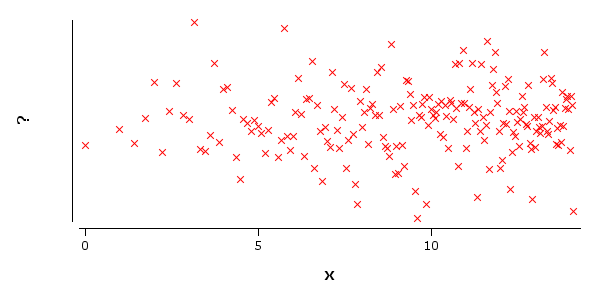

In [20]:
WS.image(points(x, VarDouble.from(x.rowCount(), Normal.std()::sampleNext), color(1), pch(3)), 600, 300);

There are various mathemaical operations available under VarOp interface. The interface to those operators can be called using `op()` method on any variable. The fllowing examples uses some of those operators.

In [21]:
// computes the sum of all values in variable
x.op().nansum();

1878.3420754046178

In [22]:
// apply a lambda function on a copy of the varialble
x.copy().op().apply(v -> Math.sqrt(v + 3./8)).printContent();

VarDouble [name:"x", rowCount:200]
 row    value    row    value    row    value    row    value    row    value   
  [0] 0.6123724  [21] 2.2265614  [42] 2.6183469  [63] 2.883098  [184] 3.7335854 
  [1] 1.1726039  [22] 2.2506479  [43] 2.6329524  [64] 2.8939592 [185] 3.7385118 
  [2] 1.3376149  [23] 2.2739462  [44] 2.6473099  [65] 2.9046958 [186] 3.7434185 
  [3] 1.4515684  [24] 2.2965146  [45] 2.6614289  [66] 2.915311  [187] 3.7483055 
  [4] 1.5411035  [25] 2.3184046  [46] 2.6753187  [67] 2.9258081 [188] 3.7531732 
  [5] 1.6158799  [26] 2.3396623  [47] 2.6889877  [68] 2.9361899 [189] 3.7580217 
  [6] 1.6806218  [27] 2.3603289  [48] 2.7024439  [69] 2.9464595 [190] 3.7628511 
  [7] 1.7380309  [28] 2.3804417  [49] 2.7156951  [70] 2.9566197 [191] 3.7676617 
  [8] 1.789812   [29] 2.4000343  [50] 2.7287484  [71] 2.9666732 [192] 3.7724536 
  [9] 1.8371173  [30] 2.4191374  [51] 2.7416106  [72] 2.9766225 [193] 3.777227  
 [10] 1.8807652  [31] 2.4377786  [52] 2.754288   [73] 2.9864701 [194] 3.78

In [23]:
// add a constant to all values of a copy
x.copy().op().plus(Math.E);

VarDouble [name:"x", rowCount:200, values: 2.718281828459045, 3.718281828459045, 4.1324953908321405, 4.450332636027922, 4.718281828459045, 4.9543498059588345, 5.167771571242223, 5.364033139523636, 5.546708953205235, 5.718281828459045, ..., 16.789529107929333, 16.82501780812493]

#### 1.3 Nominal variables

Nominal variables are defined by`VarNominal`and contains string valued categories. Nominal variables offers integer and label representations. 
The label representation represents the categories as labels or texts, while integer representation represents the categorical levels as integer indexes. The index representation does not imply an order between categories/labels. 

##### 1.1.2.1 Various builders

Nominal variables can be built in various was and are handy shortcuts for various scenarios.

**Empty variables**

In [24]:
// creates an empty nominal variable with provided levels
var nom1 = VarNominal.empty(10, "a", "b");

In [25]:
// levels of a nominal variable
nom1.levels()

[?, a, b]

In [26]:
var nom2 = VarNominal.from(10, row -> row % 2 == 0 ? "even" : "odd");
nom2.printContent();

VarNominal [name:"?", rowCount:10]
row value row value row value 
[0] even  [4] even  [8] even  
[1]  odd  [5]  odd  [9]  odd  
[2] even  [6] even  
[3]  odd  [7]  odd  

